In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sm
import statsmodels.api as sm


In [2]:
data_dumy=pd.read_csv('real_estate_price_size_year_view.csv')

In [3]:
data_dumy

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view
...,...,...,...,...
95,252460.400,549.80,2009,Sea view
96,310522.592,1037.44,2009,No sea view
97,383635.568,1504.75,2006,No sea view
98,225145.248,648.29,2015,No sea view


In [4]:
data=data_dumy.copy()
data['view']=data['view'].map({'No sea view':0, 'Sea view':1})

In [5]:
data

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1
...,...,...,...,...
95,252460.400,549.80,2009,1
96,310522.592,1037.44,2009,0
97,383635.568,1504.75,2006,0
98,225145.248,648.29,2015,0


In [6]:
y=data['price']
x1=data[['size','year','view']]

In [7]:
x=sm.add_constant(x1)
result=sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           1.02e-50
Time:                        14:17:22   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

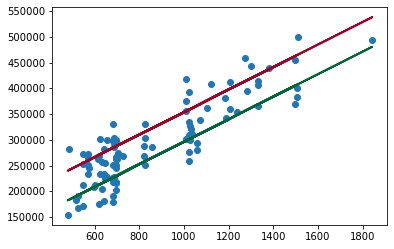

In [8]:

plt.scatter(data['size'],y)
yhat_no = 7.748e+04 + 218.7521*data['size'] + 5.756e+04 * 0
yhat_yes = 7.748e+04 + 218.7521*data['size']  + 5.756e+04 * 1
fig = plt.plot(data['size'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data['size'],yhat_yes, lw=2, c='#a50026')